In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
sys.path.append('../notebooks/')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('../notebooks/styles.mplstyle')

from src.dataset import Dataset
from src.representations import REPRESENTATIONS

# from scipy.spatial.distance import squareform
# from unidip.dip import diptst as diptest
from tableone.modality import hartigan_diptest

In [2]:
datasets = [
    'boehme-phrase',
    'boehme-random',
    'erk-phrase',
    'erk-random',
    'creighton-phrase',
    'creighton-random',
    'han-phrase',
    'han-random',
    'natmin-phrase',
    'natmin-random',
    'shanxi-phrase',
    'shanxi-random',
    'liber-antiphons-phrase',
    'liber-antiphons-random',
    'liber-responsories-phrase',
    'liber-responsories-random',
    'liber-alleluias-phrase',
    'liber-alleluias-random',
    'cantus-antiphon-neumes',
    'cantus-antiphon-syllables',
    'cantus-antiphon-words',
    'cantus-antiphon-poisson-3',
    'cantus-antiphon-poisson-5',
    'cantus-antiphon-poisson-7',
    'cantus-responsory-neumes',
    'cantus-responsory-syllables',
    'cantus-responsory-words',
    'cantus-responsory-poisson-3',
    'cantus-responsory-poisson-5',
    'cantus-responsory-poisson-7'
]

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
results = []
for dataset_name in datasets:
    
    dataset = Dataset(dataset_name)
    max_subset_size = np.max([int(size) 
        for size, index in dataset.subsets['non-unique'].items() 
        if index is not False])
    subset_size=min(1000, max_subset_size)
    lengths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]

    for representation in REPRESENTATIONS:
        for metric in ['eucl', 'dtw']:
            limit = 2000 if metric is 'eucl' else 500
            if representation.startswith('cosine') and metric == 'dtw': continue
            for length in [None] + lengths:
                entry = {
                    'dataset': dataset_name,
                    'representation': representation,
                    'metric': metric,
                    'length': length,
                    'limit': limit
                }
                try:
                    sim = dataset.similarities(representation, metric, 
                                           subset_size=subset_size,
                                           limit=limit)
                    p_value = hartigan_diptest(sim)
                    entry['p_value'] = p_value
                except:
                    entry['p_value'] = None
                
                results.append(entry)
                    

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../src/representations_h5.py:49: RuntimeWarning: invalid value encountered in true_divide
  normalized = (contours - minima) / (maxima - minima)
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/tableone/modality.py:104: RuntimeWarning: invalid value encountered in double_scalars
  if data_sort[i] - data_sort[j] < eps:
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/tableone/modality.py:740: RuntimeWarning: invalid value encountered in subtract
  if (xF[1:]-xF[:-1] < -eps).any():
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/tableo

x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = inf, x[icurr+2] = inf
x[icurr] = inf, x[icurr+1] = in

In [5]:
df = pd.DataFrame(results)
df.to_csv('../serialize/hartigans-tests.csv')

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Analyze results

In [17]:
df2 = df.query('dataset=="boehme-phrase"')

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df2 = df.query('dataset=="cantus-responsory-syllables"')
df2['condition'] = df2.representation + '-' + df2.metric
pd.pivot(df2, columns='condition',  
         index='length', values='p_value')

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


condition,cosine-eucl,cosine_centered-eucl,cosine_finalized-eucl,cosine_normalized-eucl,cosine_tonicized-eucl,interval-dtw,interval-eucl,pitch-dtw,pitch-eucl,pitch_centered-dtw,pitch_centered-eucl,pitch_finalized-dtw,pitch_finalized-eucl,pitch_normalized-dtw,pitch_normalized-eucl,pitch_tonicized-dtw,pitch_tonicized-eucl,smooth_derivative-dtw,smooth_derivative-eucl
length,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pd.pivot(df.query('dataset=="boehme-phrase"'), index)

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Signature: pd.pivot(data: 'DataFrame', index=None, columns=None, values=None) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
index : str or object, optional
    Column to use to make new frame's index. If None, uses
    existing index.
columns : str or object
    Column to use to make new frame's columns.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have hierarchically indexed columns.

    .. versionchanged:: 0.23.0
       Also ac

In [15]:
df.query('dataset=="boehme-phrase"')

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dataset,representation,metric,length,limit,p_value
0,boehme-phrase,pitch,eucl,NaN,2000,0.995668
1,boehme-phrase,pitch,eucl,2.0,2000,0.995668
2,boehme-phrase,pitch,eucl,3.0,2000,0.995668
3,boehme-phrase,pitch,eucl,4.0,2000,0.995668
4,boehme-phrase,pitch,eucl,5.0,2000,0.995668
...,...,...,...,...,...,...
242,boehme-phrase,smooth_derivative,dtw,9.0,500,0.993533
243,boehme-phrase,smooth_derivative,dtw,10.0,500,0.993533
244,boehme-phrase,smooth_derivative,dtw,15.0,500,0.993533
245,boehme-phrase,smooth_derivative,dtw,20.0,500,0.993533


/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='p_value', ylabel='Density'>

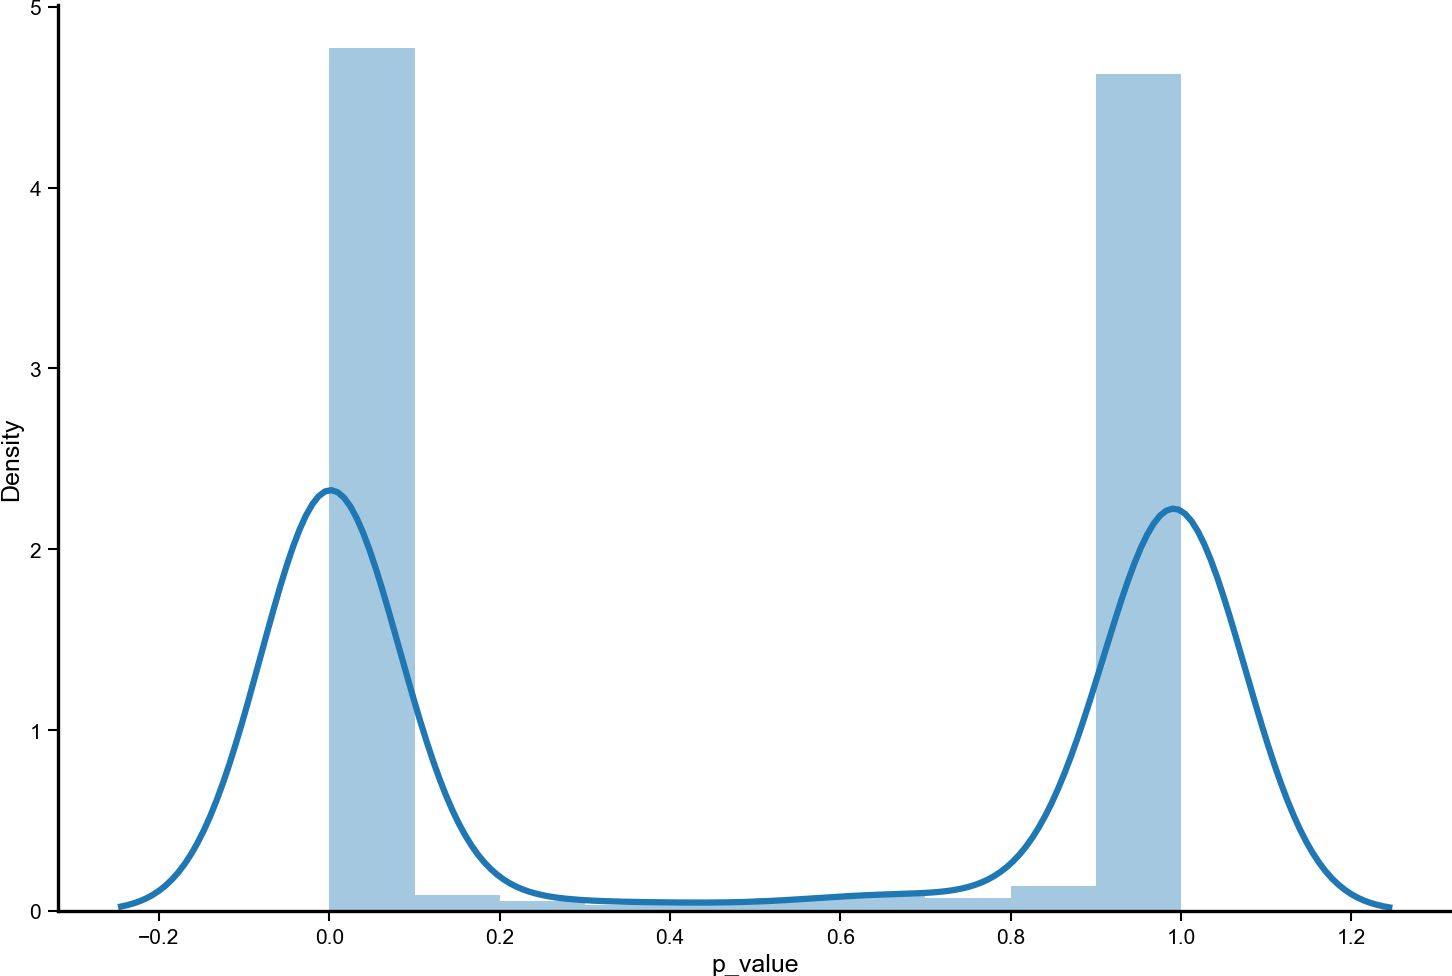

In [13]:
sns.distplot(df['p_value'])